# Exploratory Data Analysis

## Import Libraries

In [1]:
########################### Import Requisite Libraries #########################
import pandas as pd
import numpy as np
import os
import sys
import pprint
import warnings
import textwrap

################################################################################
# Add the parent directory to sys.path to access 'functions.py'
sys.path.append(os.path.join(os.pardir))
from python_scripts.functions import *

################################################################################
print("Python version:")
print(sys.version)
print()
print(f"Pandas Version = {pd.__version__}")
print(f"Numpy Version = {np.__version__}")

Python version:
3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]

Pandas Version = 2.0.3
Numpy Version = 1.24.3


## Read in the Data

In [2]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to the parent directory, then into the 'data' folder
data_path = os.path.join(os.pardir, "data")

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(data_path)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

# Read the CSV file into a DataFrame
df_eda = pd.read_parquet(os.path.join(data_path, "df_eda.parquet"))

Directory exists: ..\data
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


In [3]:
df_eda.head()

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Renal_Disease_DM,Renal_Disease_GN,Renal_Disease_HTN,Renal_Disease_Other,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl,uACR,age_group
Patient_ID,,,,,,,,,,,,,,,,,,,,,
568268916,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,1,0,0,0,291.725601,11.12,2.728,3.7,102.438624,80-89
659549633,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,0,0,0,1,3491.867044,9.72,3.162,3.0,1762.039423,50-59
406748956,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0,1,0,0,1440.947666,9.32,3.844,3.6,659.136129,60-69
109228713,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,0,1,0,0,2210.042433,9.16,5.580,3.9,1145.245058,60-69
220533110,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,1,0,0,0,1918.316832,9.80,4.309,4.3,980.939665,80-89


In [4]:
# Create an empty dictionary to store the value counts for each combination
value_counts_dict = {}

# Define the selected columns for which you want to get value counts
selected_columns = ["Renal_Disease_DM", "Renal_Disease_HTN", "Renal_Disease_GN"]

# Iterate over each combination of selected columns
for column in selected_columns:
    # Get the value counts for the current column combination
    value_counts = df_eda.groupby(
        ["Age", "Diabetes (1=yes; 0=no)", "Hypertension (1=yes; 0=no)"]
    )[column].value_counts()

    # Store the value counts in the dictionary
    value_counts_dict[column] = value_counts

# Convert the dictionary to a DataFrame
summary = pd.DataFrame(value_counts_dict)

# Reset the index to make the DataFrame more readable
summary = summary.reset_index()
summary

,Age,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),level_3,Renal_Disease_DM,Renal_Disease_HTN,Renal_Disease_GN
0,18.33,0.0,1.0,0,1.0,1.0,1.0
1,20.65,0.0,1.0,0,1.0,1.0,NaN
2,20.65,0.0,1.0,1,NaN,NaN,1.0
3,23.24,1.0,1.0,0,NaN,1.0,1.0
4,23.24,1.0,1.0,1,1.0,NaN,NaN
...,...,...,...,...,...,...,...
1097,90.46,0.0,1.0,0,1.0,1.0,1.0
1098,91.11,1.0,1.0,0,1.0,NaN,1.0
1099,91.11,1.0,1.0,1,NaN,1.0,NaN
1100,93.37,1.0,1.0,0,1.0,NaN,1.0


In [5]:
df_eda[["Renal_Disease_DM", "Renal_Disease_HTN", "Renal_Disease_GN"]].describe()

,Renal_Disease_DM,Renal_Disease_HTN,Renal_Disease_GN
count,743.000000,743.000000,743.000000
mean,0.239569,0.168237,0.115747
std,0.427108,0.374328,0.320137
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [6]:
df_eda["uACR"].min()

4.986926747049026

## Distributions

### Histogram Distributions

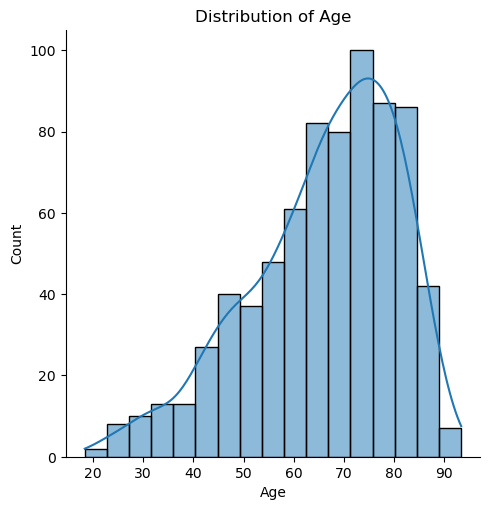

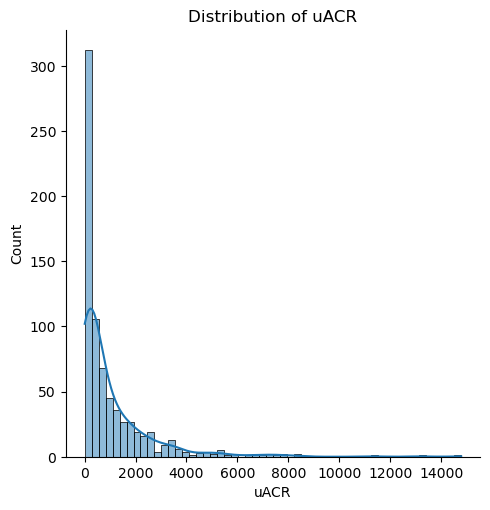

In [7]:
dist_list = ["Age", "uACR"]

for item in dist_list:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning)
        sns.displot(
            df_eda[item],
            kde=True,
        )
        plt.title(f"Distribution of {item}")
        plt.savefig(
            os.path.join(image_path_png, f"{item}_distribution.png"),
            bbox_inches="tight",
        )
        plt.savefig(
            os.path.join(image_path_svg, f"{item}_distribution.svg"),
            bbox_inches="tight",
        )
        plt.show()

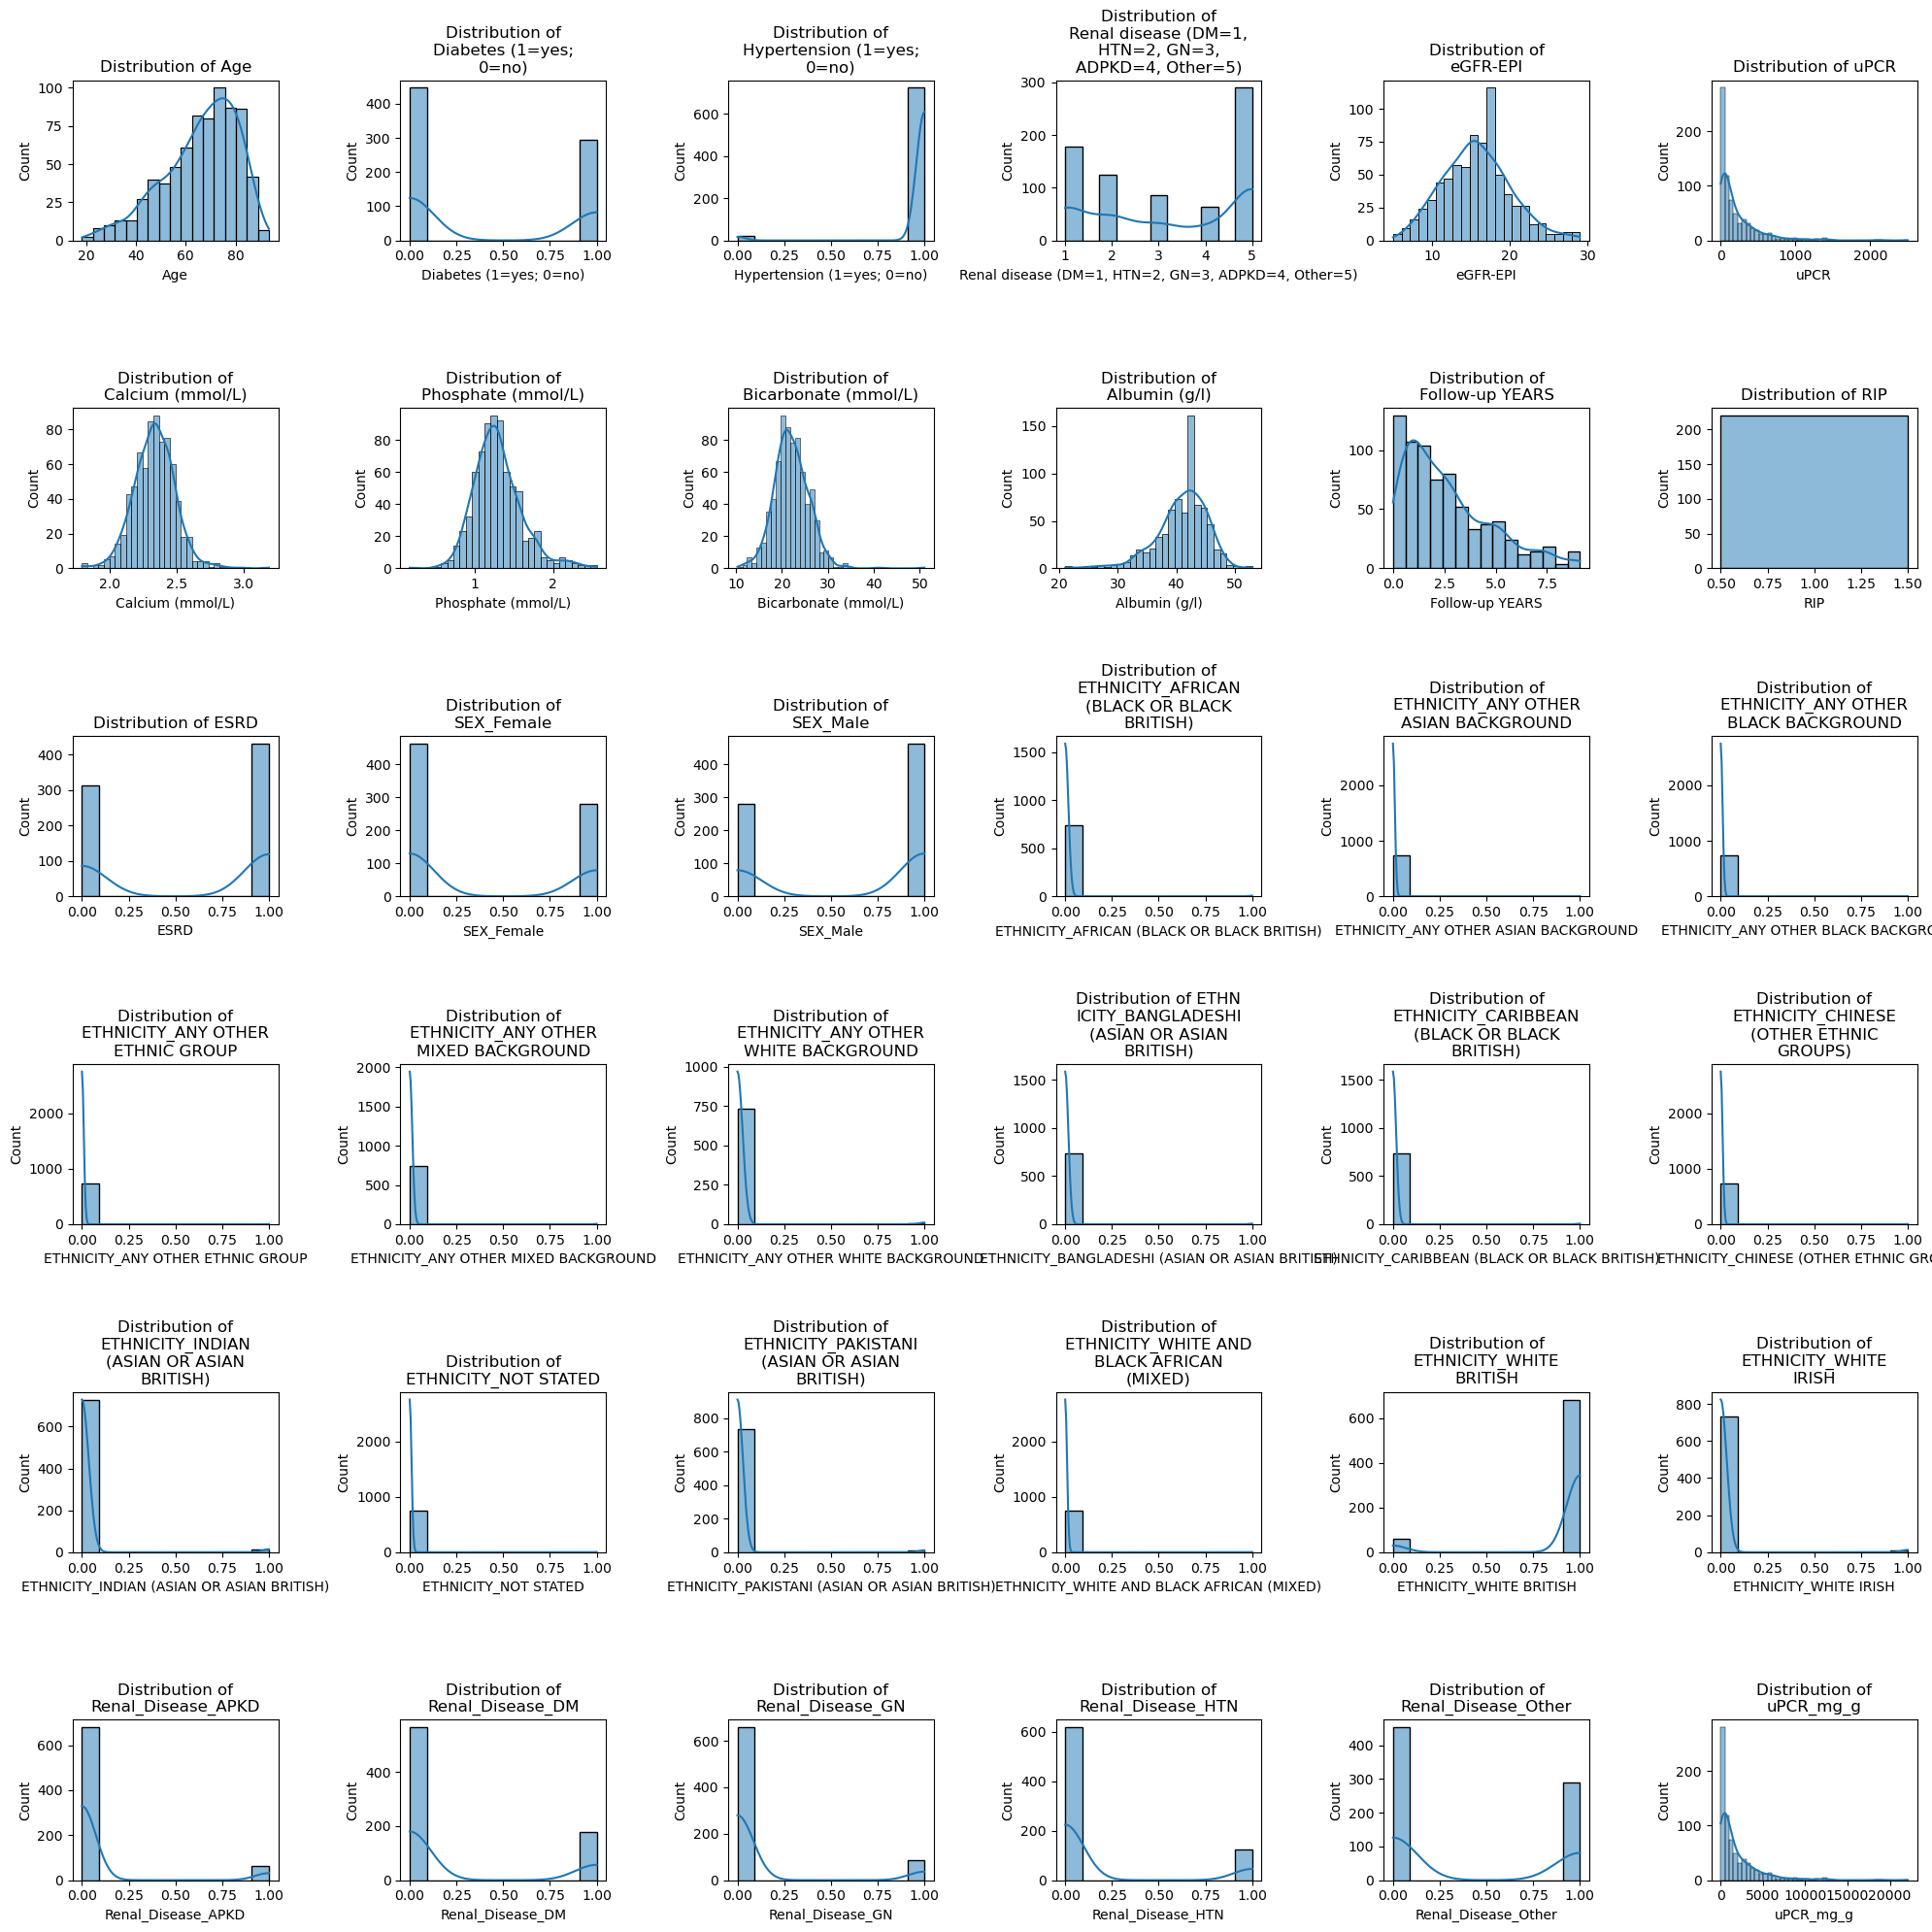

In [8]:
kde_distributions(
    df=df_eda,
    x=20,
    y=20,
    kde=True,
    w_pad=4,
    h_pad=4,
    text_wrap=20,
    n_rows=6,
    n_cols=6,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="numeric_distributions",
    bbox_inches="tight",
    dist_list=df_eda.select_dtypes(np.number).columns.to_list(),
)

### Box Plot Distributions

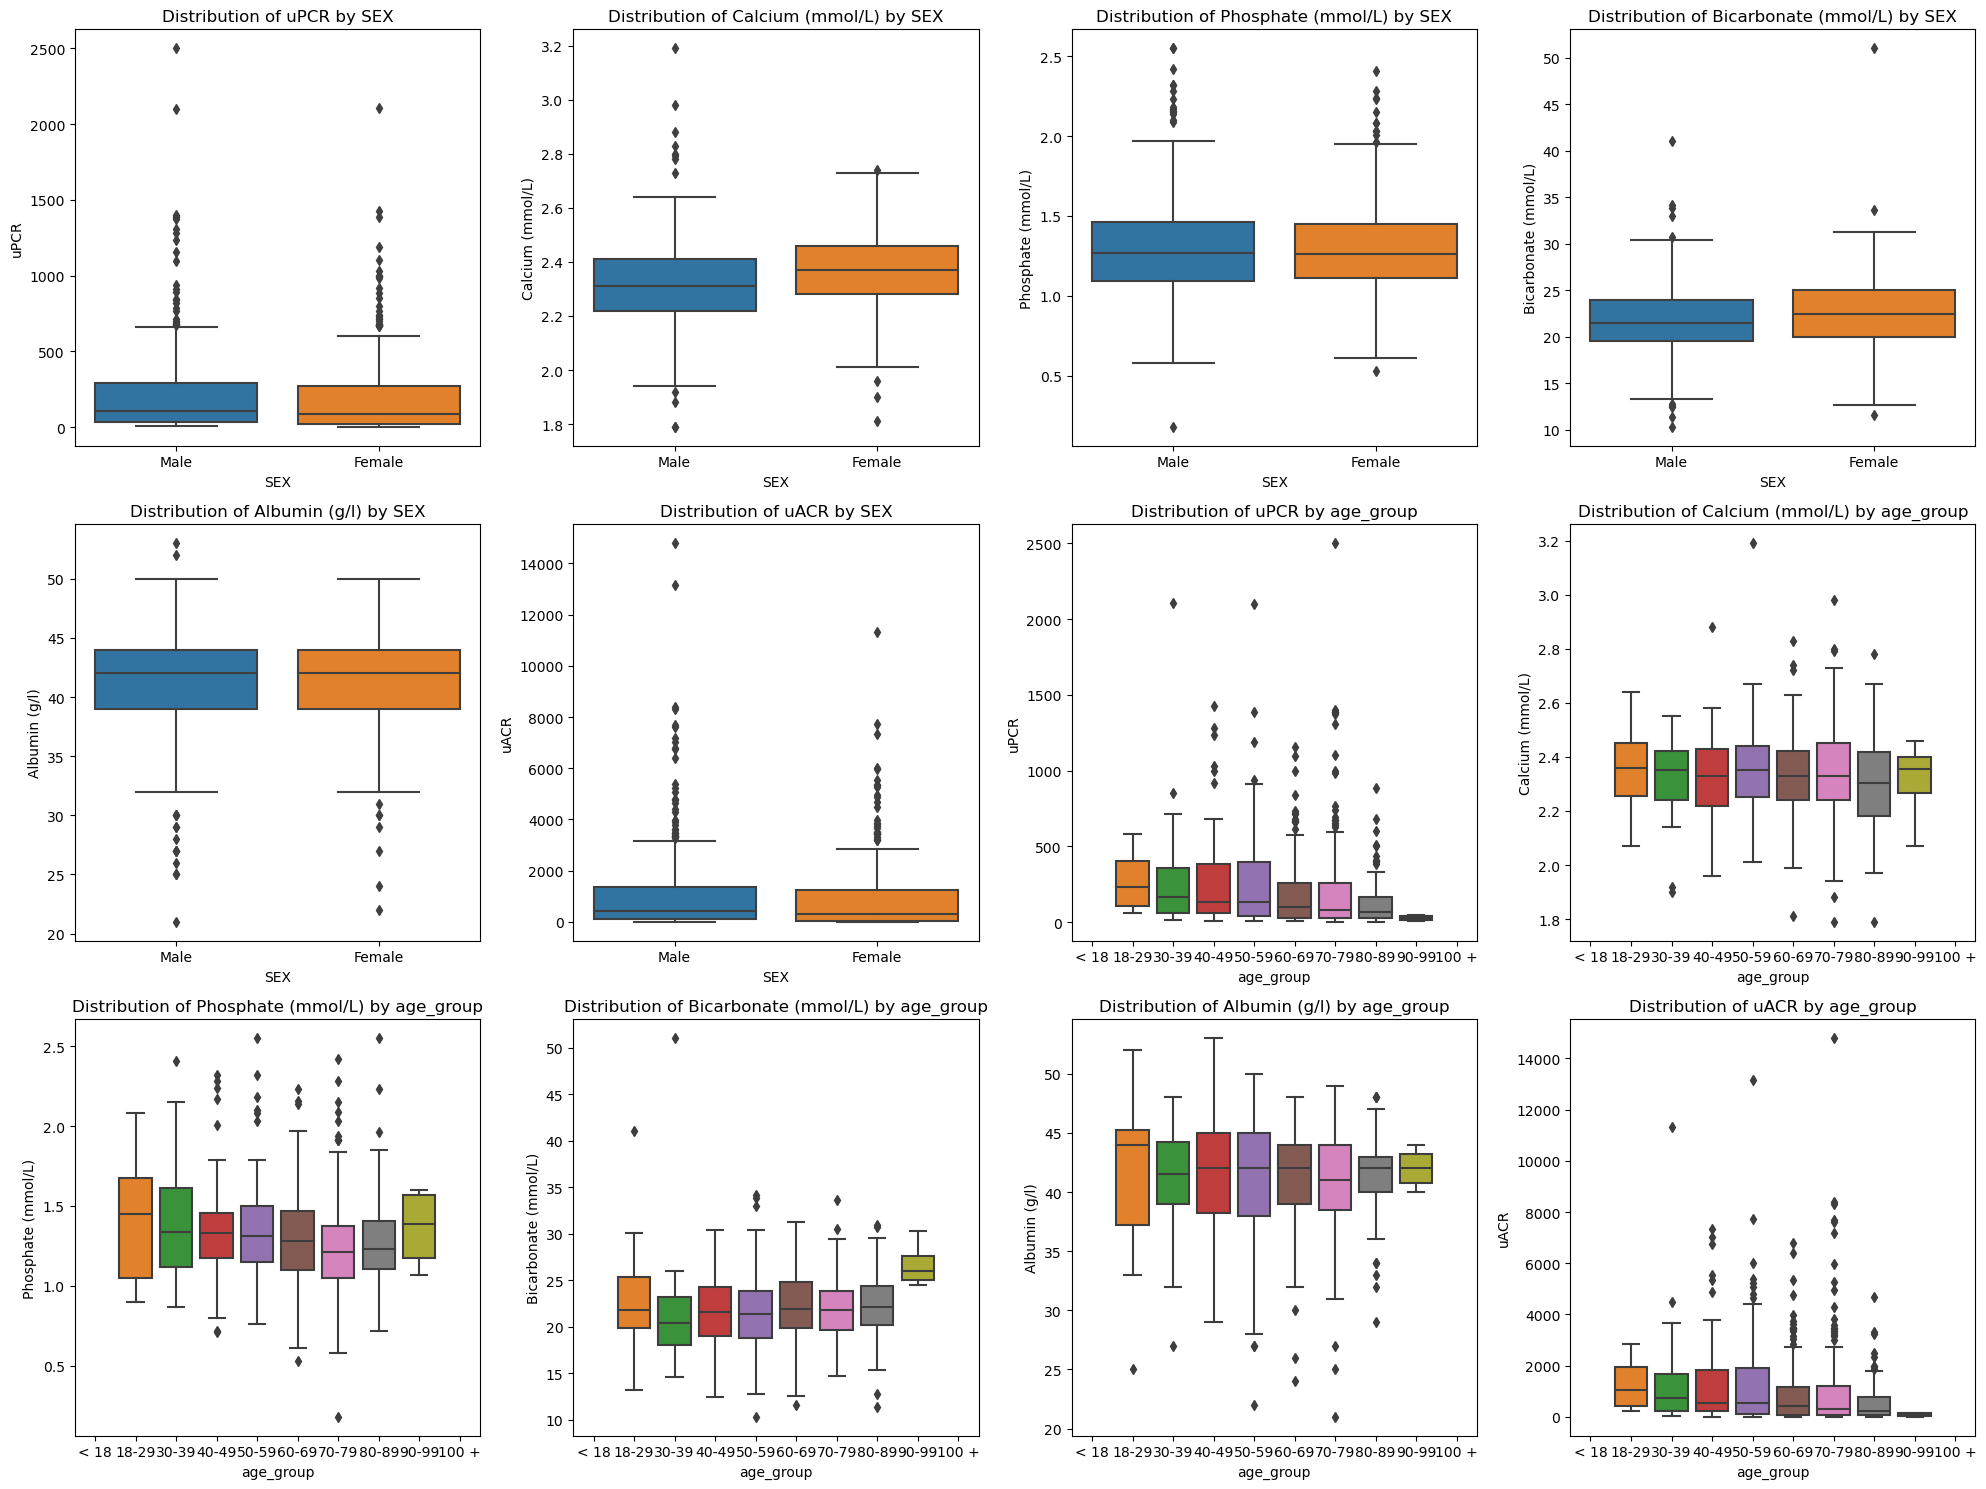

In [9]:
metrics_list = [
    "uPCR",
    "Calcium (mmol/L)",
    "Phosphate (mmol/L)",
    "Bicarbonate (mmol/L)",
    "Albumin (g/l)",
    "uACR",
]
metrics_boxplot_comp = ["SEX", "age_group"]
n_rows = 3
n_cols = 4
create_metrics_boxplots(
    df_eda,
    metrics_list,
    metrics_boxplot_comp,
    n_rows,
    n_cols,
    image_path_png,
    image_path_svg,
    save_individual=True,
    save_both=True,
)

## Time Series Visualizations

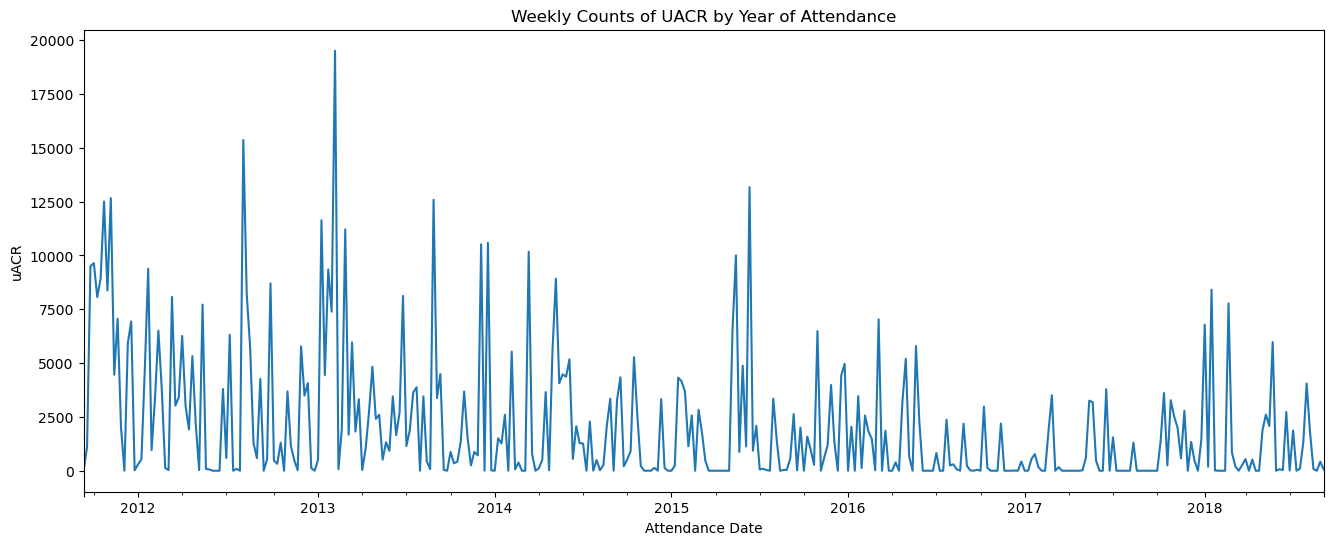

In [10]:
plt.figure(figsize=(16, 6))
df_eda.resample("W", on="Att_date")["uACR"].sum().plot(kind="line")
plt.title("Weekly Counts of UACR by Year of Attendance")
plt.xlabel("Attendance Date")
plt.ylabel("uACR")
plt.savefig(os.path.join(image_path_png, "weekly_uACR_attendance.png"))
plt.savefig(os.path.join(image_path_svg, "weekly_uACR_attendance.svg"))
plt.show()

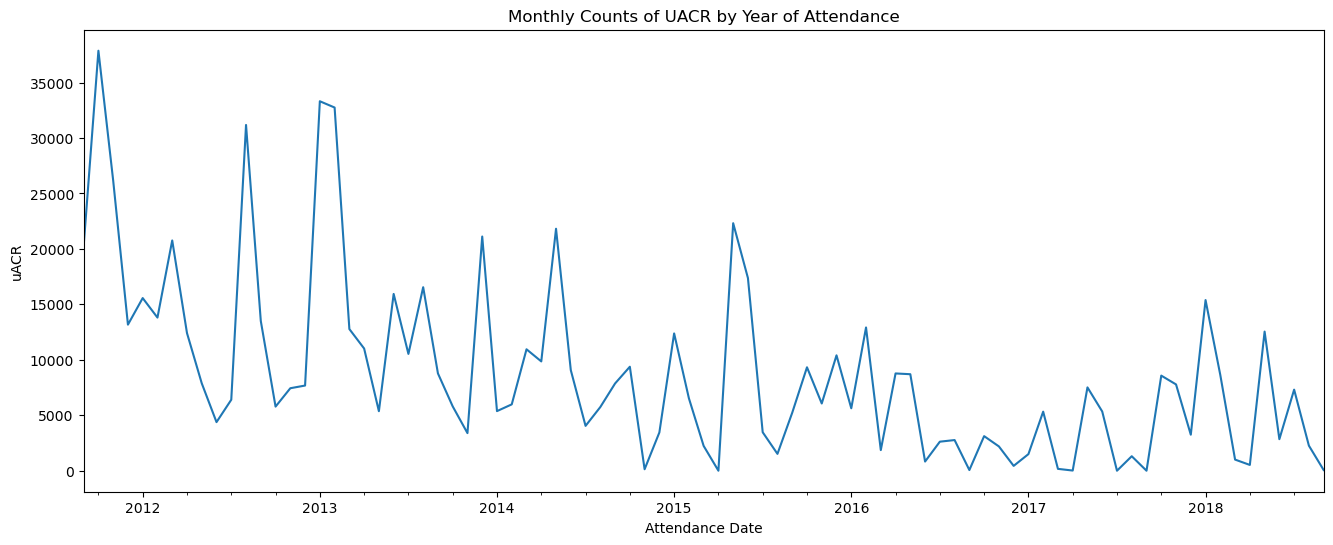

In [11]:
plt.figure(figsize=(16, 6))
df_eda.resample("M", on="Att_date")["uACR"].sum().plot(kind="line")
plt.title("Monthly Counts of UACR by Year of Attendance")
plt.xlabel("Attendance Date")
plt.ylabel("uACR")
plt.savefig(os.path.join(image_path_png, "monthly_uACR_attendance.png"))
plt.savefig(os.path.join(image_path_svg, "monthly_uACR_attendance.svg"))
plt.show()

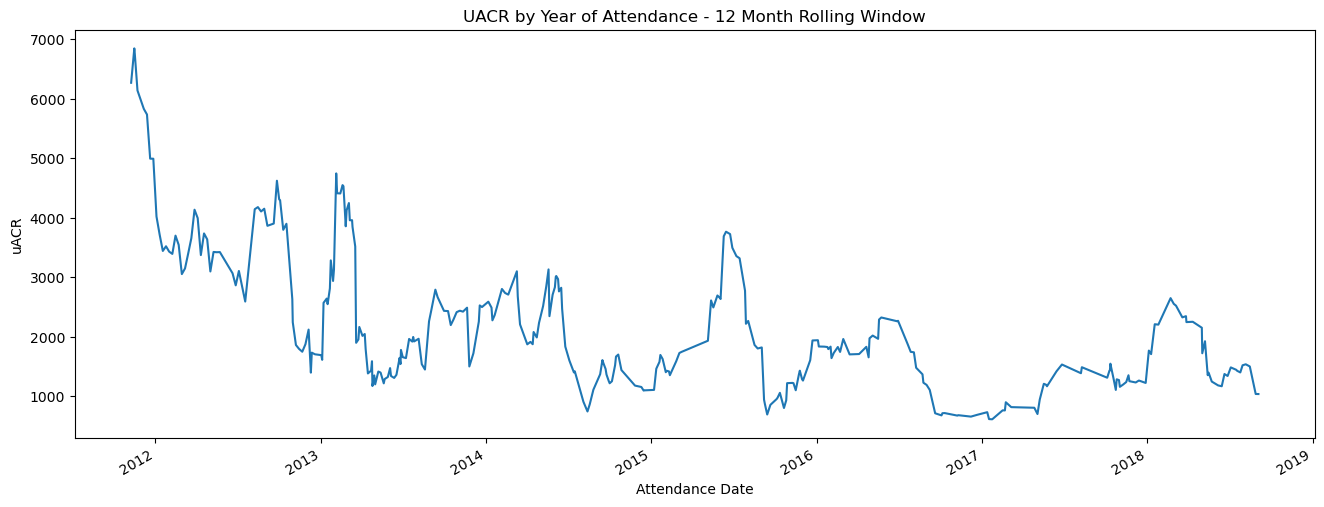

In [12]:
plt.figure(figsize=(16, 6))
df_eda.groupby("Att_date")["uACR"].sum().rolling(window=12).mean().plot(kind="line")
plt.title("UACR by Year of Attendance - 12 Month Rolling Window")
plt.xlabel("Attendance Date")
plt.ylabel("uACR")
plt.savefig(os.path.join(image_path_png, "rolling_12_uACR_attendance.png"))
plt.savefig(os.path.join(image_path_svg, "rolling_12_uACR_attendance.svg"))
plt.show()

## Ethnicity by Sex

In [13]:
# Define a base color mapping that can be reversed if needed
base_colors = {
    "good": ["#c8544c", "#1f77b4"],
    "bad": ["#1f77b4", "#c8544c"],
    "other_color": ["#1f77b4", "#203764"],
}

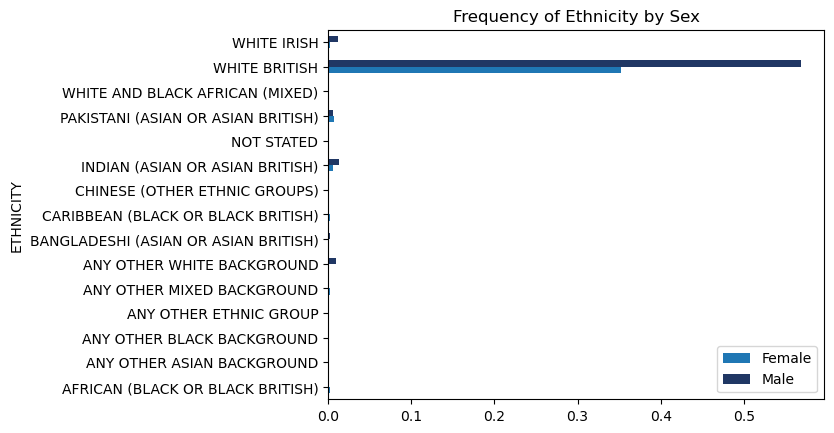

In [14]:
pd.crosstab(df_eda["ETHNICITY"], df_eda["SEX"], normalize=True).sort_values(
    by=["ETHNICITY"]
).plot(kind="barh", color=base_colors["other_color"])
plt.title("Frequency of Ethnicity by Sex")
plt.legend(loc="lower right")
plt.savefig(
    os.path.join(image_path_png, "freq_ethnicity_by_sex.png"), bbox_inches="tight"
)
plt.savefig(
    os.path.join(image_path_svg, "freq_ethnicity_by_sex.svg"), bbox_inches="tight"
)
plt.show()

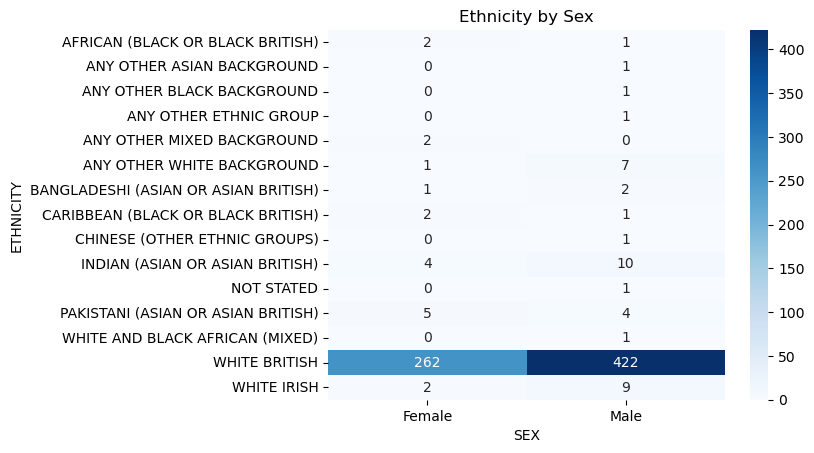

In [15]:
sns.heatmap(
    pd.crosstab(df_eda["ETHNICITY"], df_eda["SEX"]), annot=True, cmap="Blues", fmt="d"
)
plt.title("Ethnicity by Sex")
plt.savefig(os.path.join(image_path_png, "ethnicity_by_sex.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_path_svg, "ethnicity_by_sex.svg"), bbox_inches="tight")
plt.show()

## Age by Sex

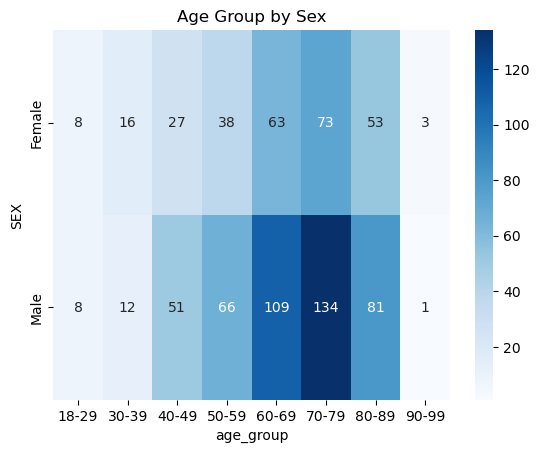

In [16]:
sns.heatmap(
    pd.crosstab(df_eda["SEX"], df_eda["age_group"]), annot=True, cmap="Blues", fmt="d"
)
plt.title("Age Group by Sex")
plt.savefig(os.path.join(image_path_png, "age_by_sex.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_path_svg, "age_by_sex.svg"), bbox_inches="tight")
plt.show()

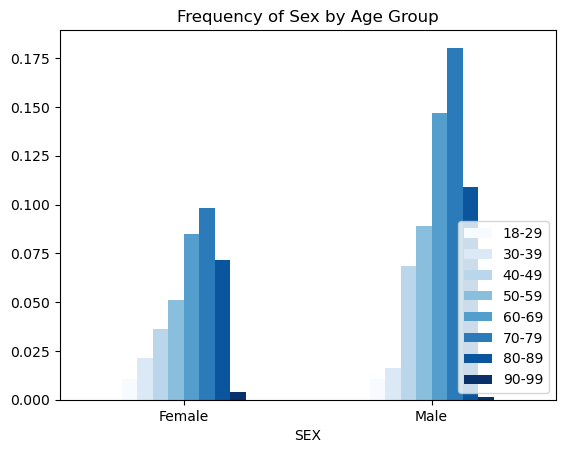

In [17]:
pd.crosstab(df_eda["SEX"], df_eda["age_group"], normalize=True).sort_values(
    by=["SEX"]
).plot(kind="bar", rot=0, cmap="Blues")
plt.title("Frequency of Sex by Age Group")
plt.legend(loc="lower right")
plt.savefig(os.path.join(image_path_png, "freq_age_by_sex.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_path_svg, "freq_age_by_sex.svg"), bbox_inches="tight")
plt.show()

## Outcome by Ethnicity

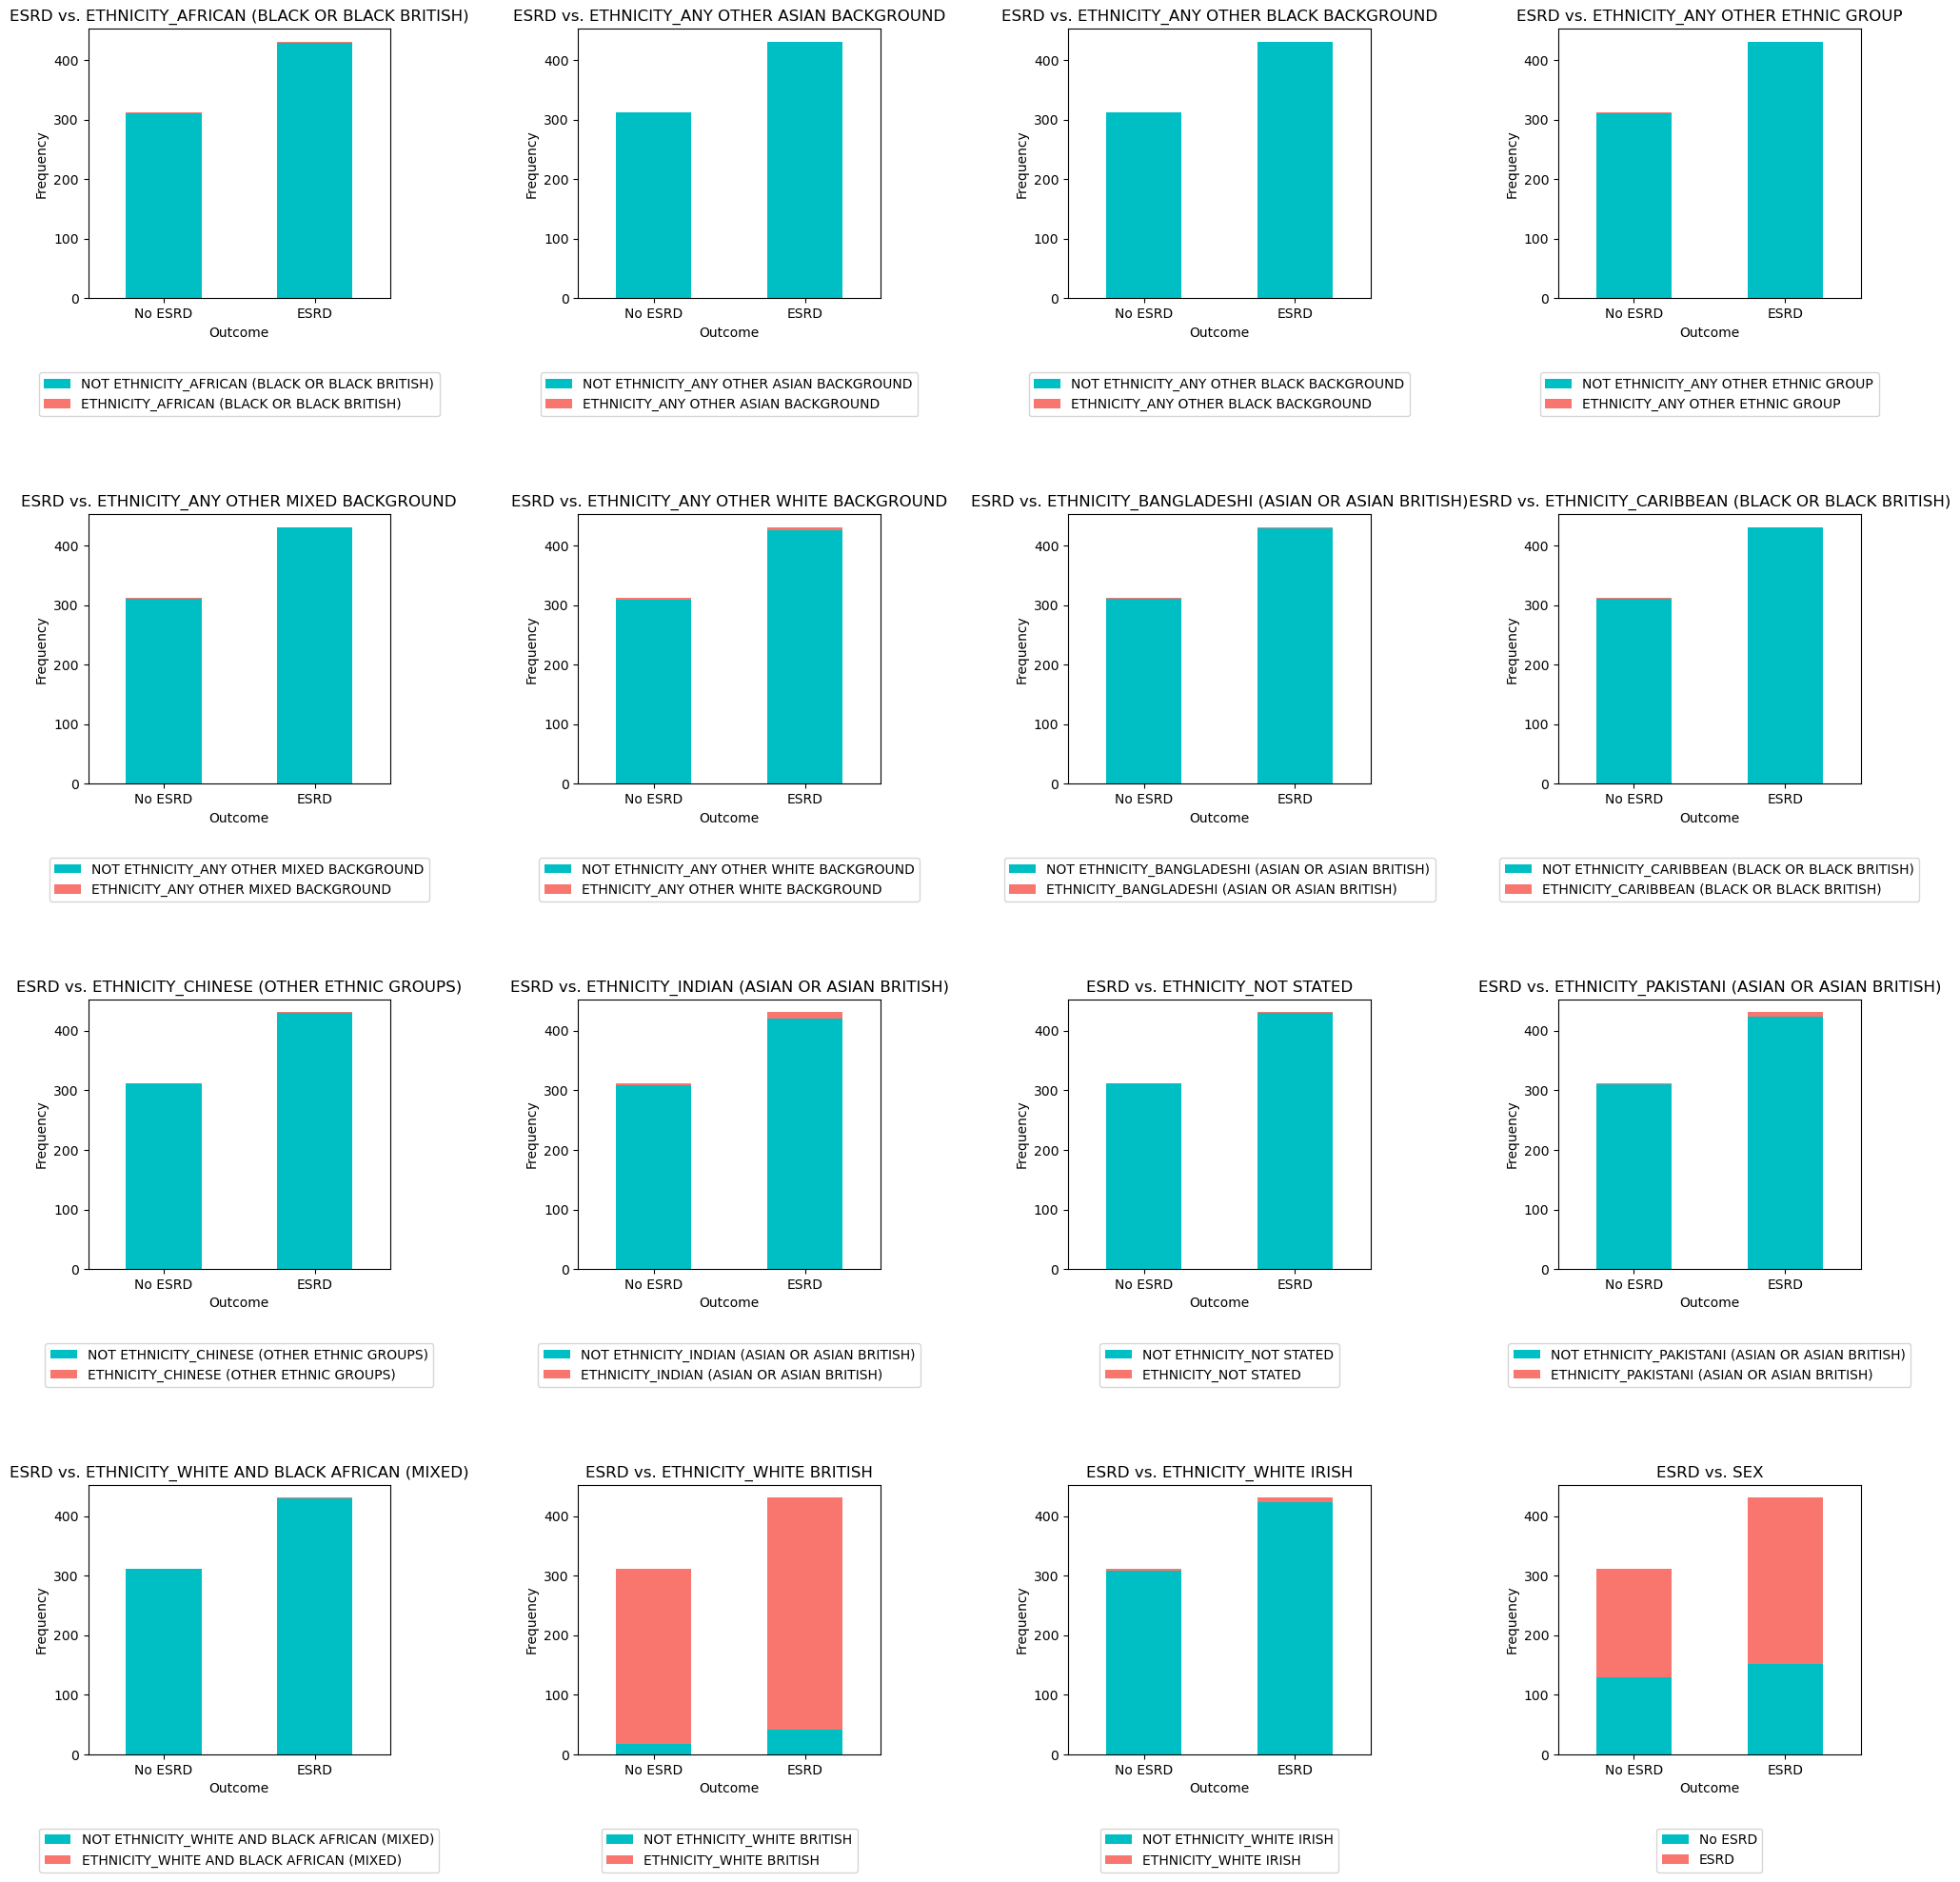

In [18]:
bar_list = df_eda[
    [col for col in df_eda.columns if "ETHNICITY_" in col] + ["SEX"]
].columns.to_list()

crosstab_plot(
    df=df_eda,
    outcome="ESRD",
    sub1=4,
    sub2=4,
    x=20,
    y=20,
    list_name=bar_list,
    label1="No ESRD",
    label2="ESRD",
    col1="SEX",
    item1="No ESRD",
    item2="ESRD",
    bbox_to_anchor=(0.5, -0.25),
    w_pad=6,
    h_pad=5,
    crosstab_option=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="esrd_ethnicities_sex",
    tight_layout=True,
    bbox_inches="tight",
)

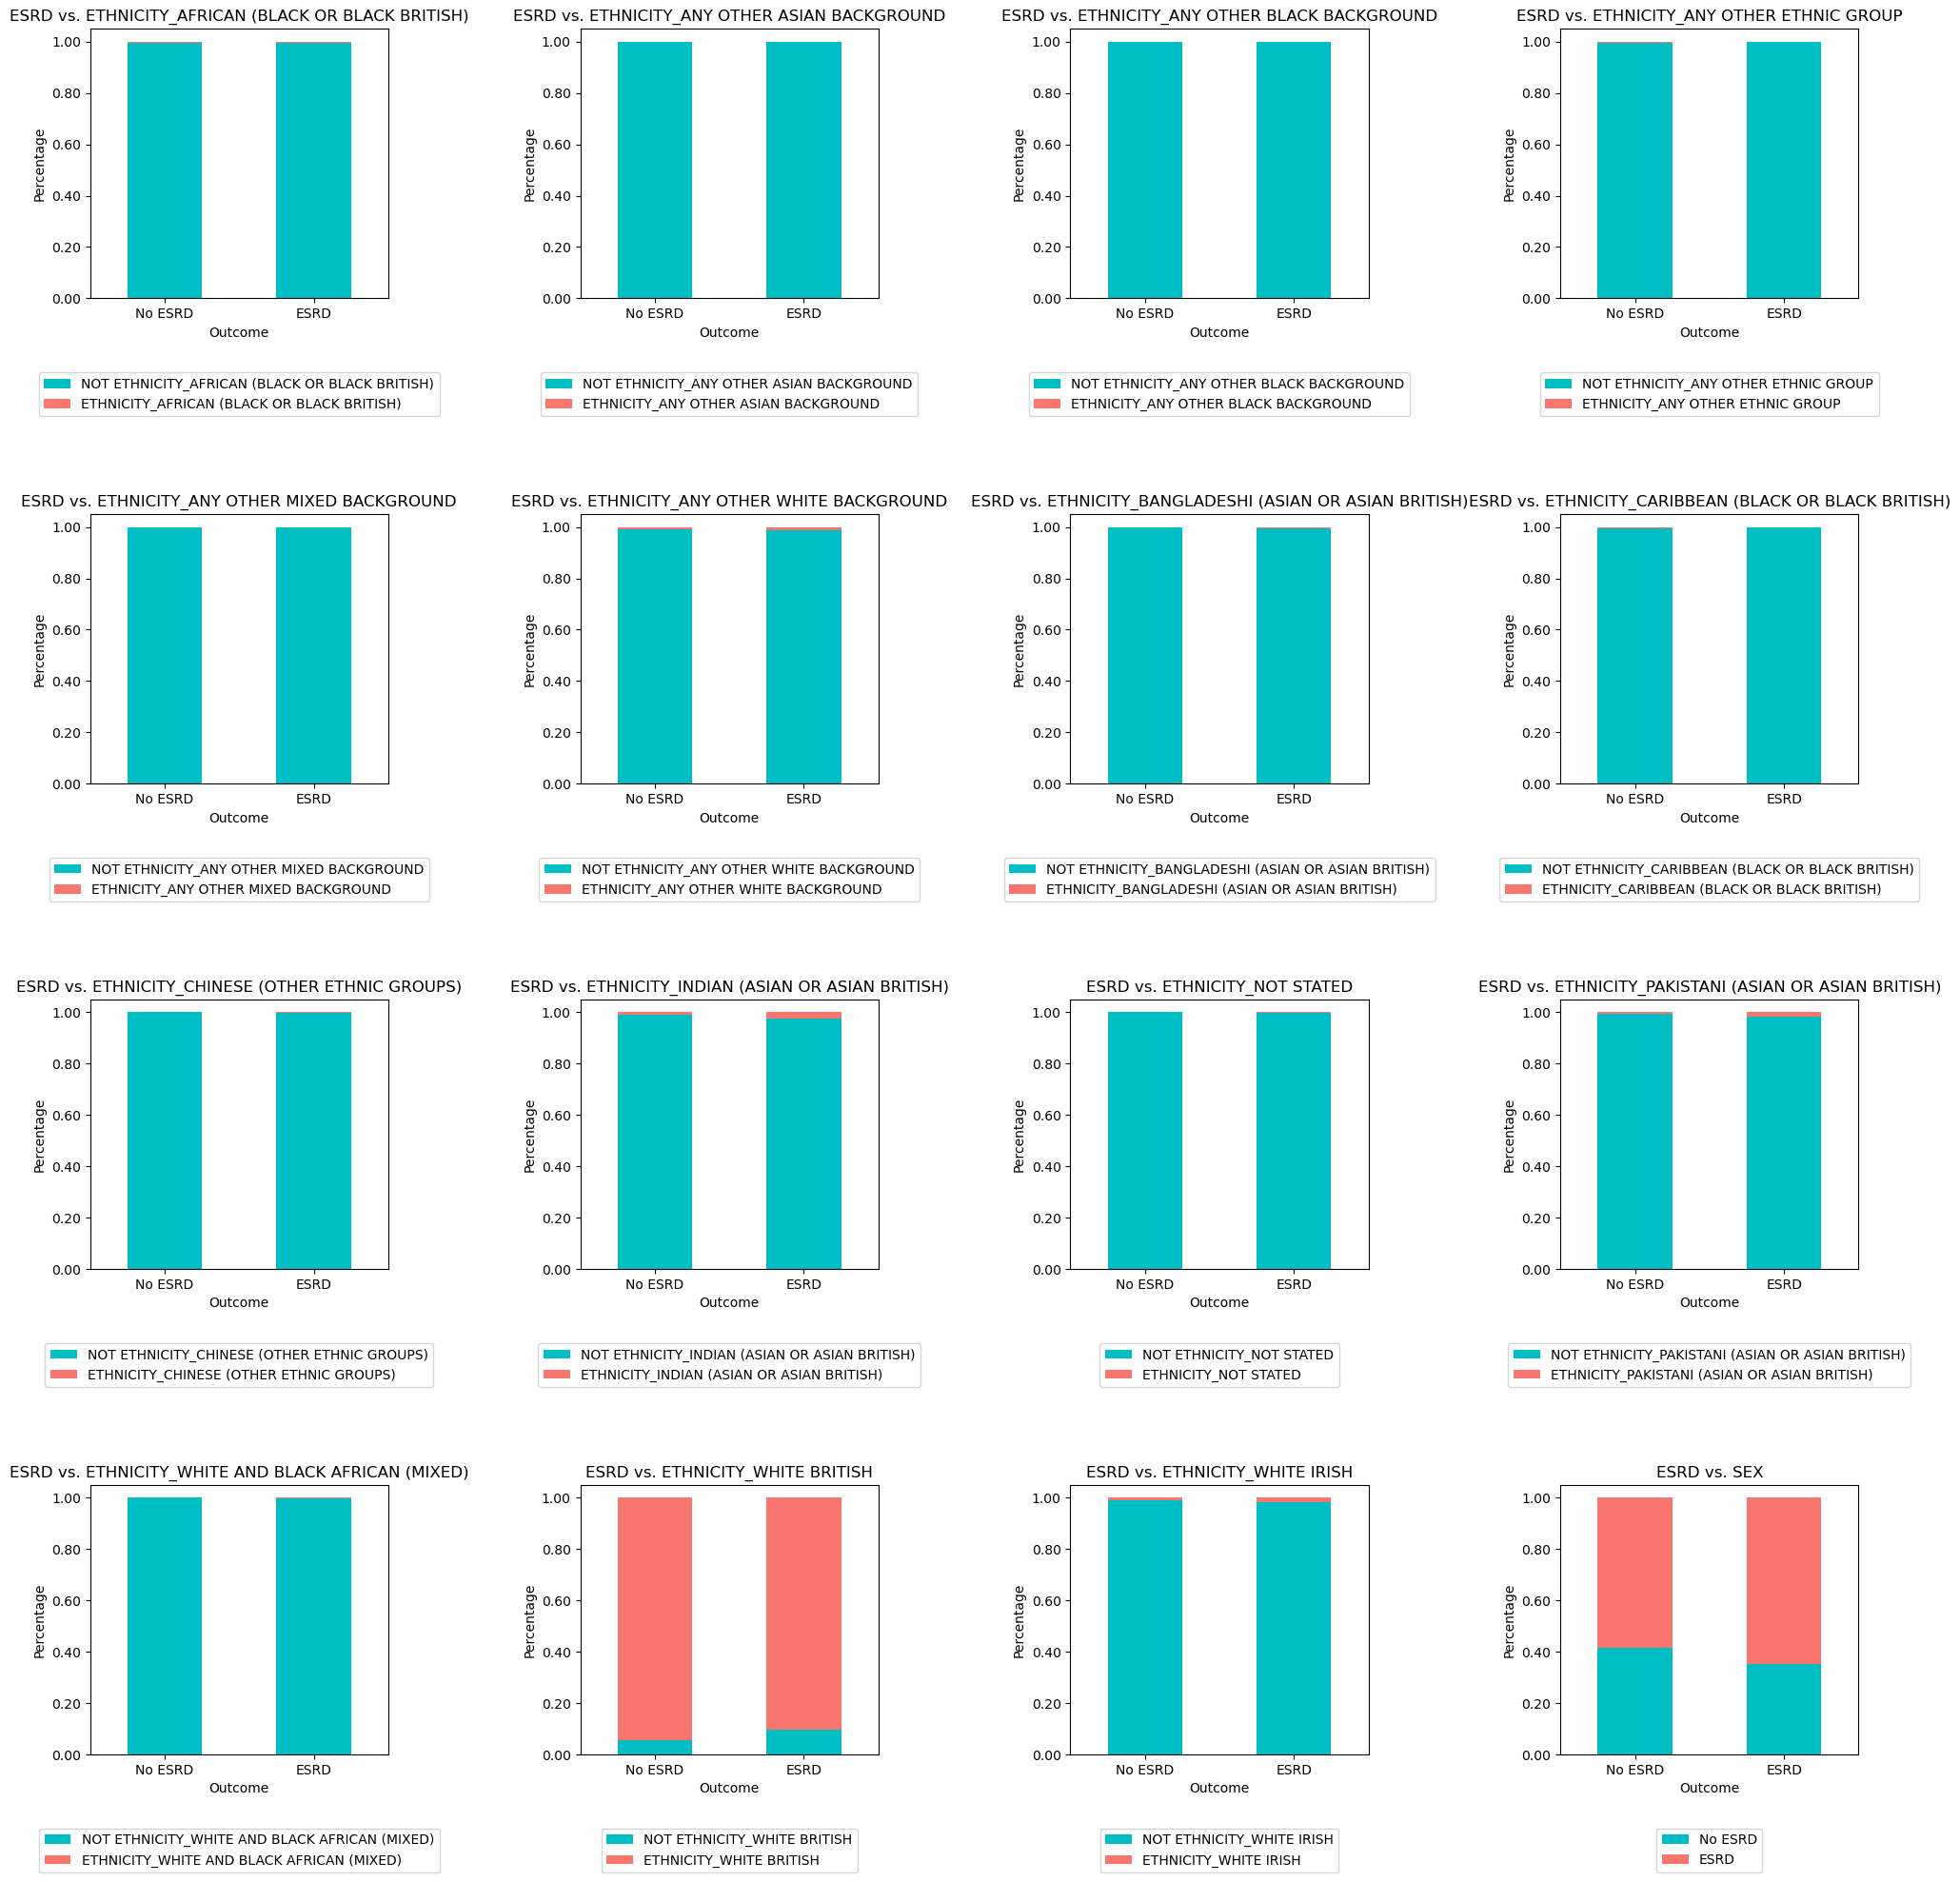

In [19]:
crosstab_plot(
    df=df_eda,
    outcome="ESRD",
    sub1=4,
    sub2=4,
    x=20,
    y=20,
    list_name=bar_list,
    label1="No ESRD",
    label2="ESRD",
    col1="SEX",
    item1="No ESRD",
    item2="ESRD",
    bbox_to_anchor=(0.5, -0.25),
    w_pad=6,
    h_pad=5,
    crosstab_option=False,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="esrd_ethnicities_sex_normalized",
    tight_layout=True,
    bbox_inches="tight",
)

## Outcomes by Age

All crosstabs have been saved as separate tabs in the Excel file: ..\data\outcomes_by_age_group.xlsx


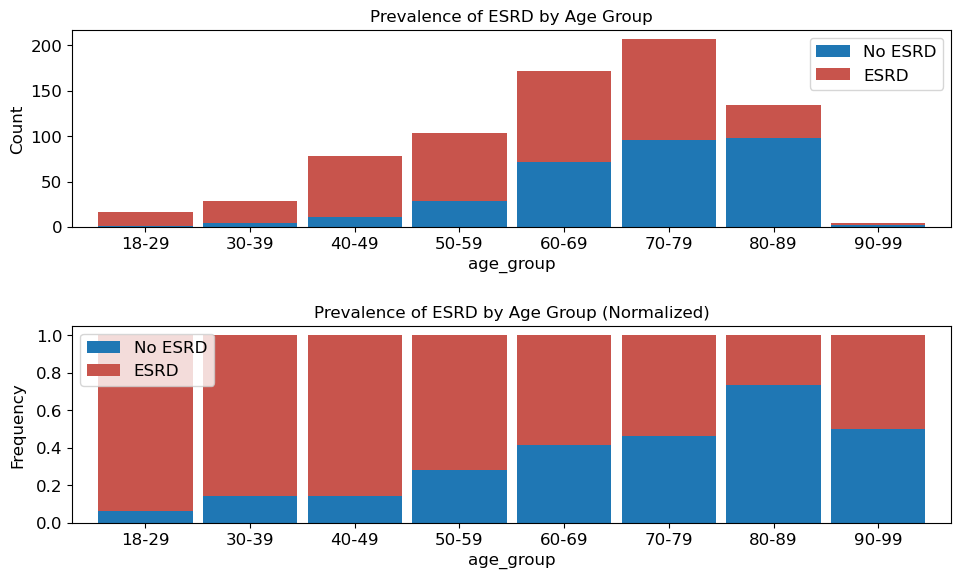

ESRD,No ESRD,ESRD,Total,ESRD_%,No ESRD_%,Total_%
age_group,,,,,,
18-29,1,15,16,94.0,6.0,100.0
30-39,4,24,28,86.0,14.0,100.0
40-49,11,67,78,86.0,14.0,100.0
50-59,29,75,104,72.0,28.0,100.0
60-69,71,101,172,59.0,41.0,100.0
70-79,96,111,207,54.0,46.0,100.0
80-89,98,36,134,27.0,73.0,100.0
90-99,2,2,4,50.0,50.0,100.0
Total,312,431,743,58.0,42.0,100.0


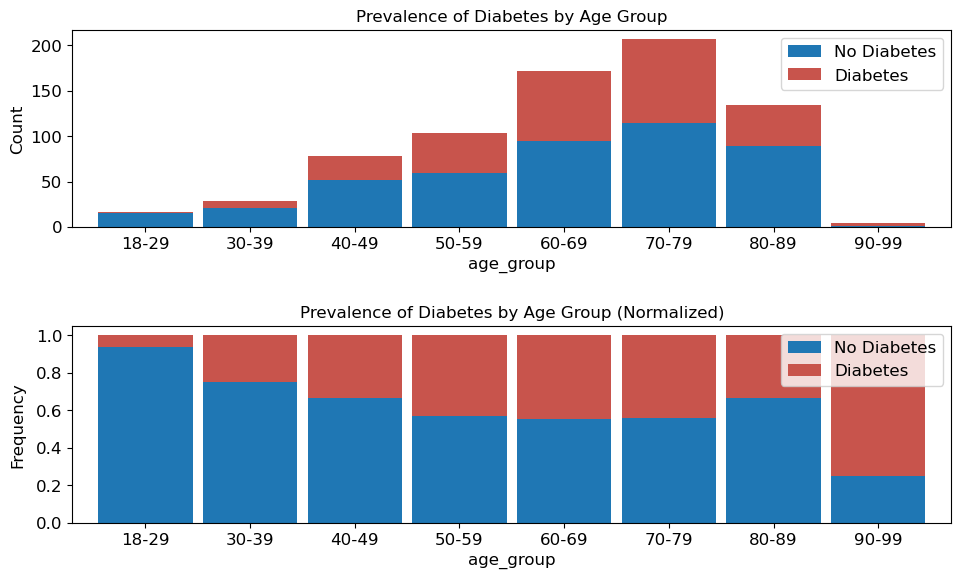

Diabetes (1=yes; 0=no),No Diabetes,Diabetes,Total,Diabetes_%,No Diabetes_%,Total_%
age_group,,,,,,
18-29,15,1,16,6.0,94.0,100.0
30-39,21,7,28,25.0,75.0,100.0
40-49,52,26,78,33.0,67.0,100.0
50-59,59,45,104,43.0,57.0,100.0
60-69,95,77,172,45.0,55.0,100.0
70-79,115,92,207,44.0,56.0,100.0
80-89,89,45,134,34.0,66.0,100.0
90-99,1,3,4,75.0,25.0,100.0
Total,447,296,743,40.0,60.0,100.0


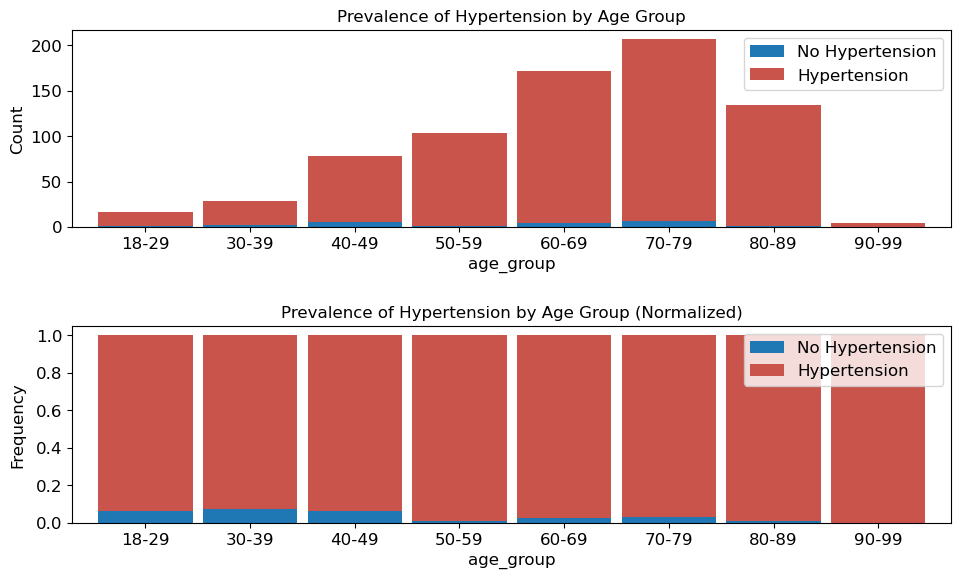

Hypertension (1=yes; 0=no),No Hypertension,Hypertension,Total,Hypertension_%,No Hypertension_%,Total_%
age_group,,,,,,
18-29,1,15,16,94.0,6.0,100.0
30-39,2,26,28,93.0,7.0,100.0
40-49,5,73,78,94.0,6.0,100.0
50-59,1,103,104,99.0,1.0,100.0
60-69,4,168,172,98.0,2.0,100.0
70-79,6,201,207,97.0,3.0,100.0
80-89,1,133,134,99.0,1.0,100.0
90-99,0,4,4,100.0,0.0,100.0
Total,20,723,743,97.0,3.0,100.0


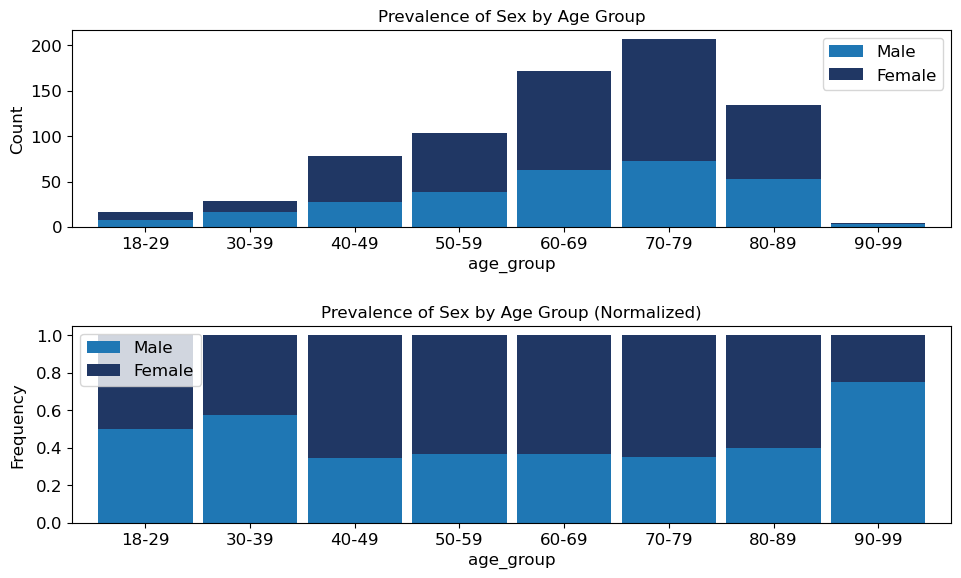

SEX,Female,Male,Total,Female_%,Male_%,Total_%
age_group,,,,,,
18-29,8,8,16,50.0,50.0,100.0
30-39,16,12,28,57.0,43.0,100.0
40-49,27,51,78,35.0,65.0,100.0
50-59,38,66,104,37.0,63.0,100.0
60-69,63,109,172,37.0,63.0,100.0
70-79,73,134,207,35.0,65.0,100.0
80-89,53,81,134,40.0,60.0,100.0
90-99,3,1,4,75.0,25.0,100.0
Total,281,462,743,38.0,62.0,100.0


In [20]:
esrd_legend = ["No ESRD", "ESRD"]

# Functional columns defined
explore_columns = [
    "ESRD",
    "Diabetes (1=yes; 0=no)",
    "Hypertension (1=yes; 0=no)",
    "SEX",
]


# Legends and titles corresponding to each 'Functional' column
labels_list = [
    ["No ESRD", "ESRD"],
    ["No Diabetes", "Diabetes"],
    ["No Hypertension", "Hypertension"],
    ["Male", "Female"],
]

# Mapping of columns to their nature (good/bad)
# Mapping of columns to their nature (good/bad/other_color)
nature_of_outcomes = {
    "ESRD": "bad",
    "Diabetes (1=yes; 0=no)": "bad",
    "Hypertension (1=yes; 0=no)": "bad",
    "SEX": "other_color",
}

# List of custom plotting titles
title_list = [
    "ESRD",
    "Diabetes",
    "Hypertension",
    "Sex",
]

# Dictionary to store each crosstab DataFrame
crosstabs_dict = {}

###################### Create crosstab data tables #############################
# Loop through the columns and names
for expl_col, names in zip(explore_columns, labels_list):
    # Create crosstab for the current column
    crosstab = pd.crosstab(
        df_eda["age_group"], df_eda[expl_col], margins=True, margins_name="Total"
    ).rename(columns={0: names[0], 1: names[1]})

    # Calculate percentages
    crosstab[names[1] + "_%"] = round(crosstab[names[1]] / crosstab["Total"], 2) * 100
    crosstab[names[0] + "_%"] = round(crosstab[names[0]] / crosstab["Total"], 2) * 100
    crosstab["Total_%"] = crosstab[names[1] + "_%"] + crosstab[names[0] + "_%"]

    # Store the crosstab in the dictionary
    crosstabs_dict[expl_col] = crosstab

# Accessing one of the crosstabs, for example for "Functional_Outcomes_Pain"
esrd_by_age = crosstabs_dict["ESRD"]
diab_by_age = crosstabs_dict["Diabetes (1=yes; 0=no)"]
htn_by_age = crosstabs_dict["Hypertension (1=yes; 0=no)"]
sex_by_age = crosstabs_dict["SEX"]

############### Save new excel file w/ functional outcomes by age ##############

file_path = os.path.join(data_path, "outcomes_by_age_group.xlsx")

# Combine all crosstabs horizontally (side by side)
all_crosstabs_combined = pd.concat(list(crosstabs_dict.values()), axis=1)

# Save each crosstab in its tab and the combined DataFrame in the last tab
# Use pandas ExcelWriter to save each DataFrame as a separate sheet
with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
    for expl_col, crosstab in crosstabs_dict.items():
        crosstab.to_excel(
            writer, sheet_name=expl_col[:31]
        )  # Excel sheet names are limited to 31 characters

    # Save the combined DataFrame in the last tab
    all_crosstabs_combined.to_excel(writer, sheet_name="All Combined")

print(f"All crosstabs have been saved as separate tabs in the Excel file: {file_path}")
################################################################################

######################### Plot the Stacked Bar Graphs ##########################

# For each plot, correctly constructing the full path including the filename

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Loop through the columns, legends, and titles
# Loop through the columns, legends, and titles for plotting
# Loop through the columns, legends, and titles
for expl_col, legend_labels, title in zip(
    explore_columns,
    labels_list,
    title_list,
):
    colors = (
        base_colors["good"]
        if nature_of_outcomes[expl_col] == "good"
        else (
            base_colors["bad"]
            if nature_of_outcomes[expl_col] == "bad"
            else base_colors["other_color"]
        )
    )

    # Create full file paths for saving the images
    expl_col_filename_png = os.path.join(image_path_png, f"Age_by_{expl_col}.png")
    expl_col_filename_svg = os.path.join(image_path_svg, f"Age_by_{expl_col}.svg")

    # Setup the image path dictionary with full file paths
    image_path = {"png": expl_col_filename_png, "svg": expl_col_filename_svg}

    stacked_plot(
        x=12,
        y=8,
        p=10,
        df=df_eda,
        col="age_group",
        truth=expl_col,
        condition=1,
        kind="bar",
        width=0.9,
        rot=0,
        legend_labels=legend_labels,  # Use the corresponding legend labels
        image_path={"png": expl_col_filename_png, "svg": expl_col_filename_svg},
        img_string=f"presence_of_{title.lower()}_by_age",
        save_formats=["png", "svg"],
        custom_title=f"Prevalence of {title} by Age Group",
        color=colors,
    )
    display(crosstabs_dict[expl_col])

## References

Ali, I., Donne, R. L., & Kalra, P. A. (2021). A validation study of the kidney failure risk equation in advanced chronic kidney disease according to disease aetiology with evaluation of discrimination, calibration and clinical utility. *BMC Nephrology, 22(1),* 194.  doi: 10.1186/s12882-021-02402-1
